In [94]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [95]:
# Reading the data from csv files
# CSV files are generated based on web scraping code from CARMAX
## Texas Data
df_TX_1 = pd.read_csv('Ford_TX.csv')
df_TX_1['state'] = 'TX'
df_TX_2 = pd.read_csv('Ford_TX2.csv')
df_TX_2['state'] = 'TX'
df_TX_3 = pd.read_csv('Toyota_TX.csv')
df_TX_3['state'] = 'TX'
## NY Data
df_NY_1 = pd.read_csv('Ford_NY_1.csv')
df_NY_1['state'] = 'NY'
df_NY_2 = pd.read_csv('Ford_NY_2.csv')
df_NY_2['state'] = 'NY'
## California Data
df_CA = pd.read_csv('Ford_CA.csv')
df_CA['state']='CA'

### Merging/Cleaning all data 

In [96]:
df = pd.concat([df_TX_1,df_TX_2,df_TX_3,df_NY_1,df_NY_2,df_CA],axis=0).reset_index(drop=True)
df.shape

(2631, 14)

In [97]:
df.drop('Unnamed: 0', axis=1 , inplace=True)
df.head()

,car_mileage,car_price,car_mpg,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state
0,93K miles,"$13,998*",['22/33 mpg'],2015,Fusion Titanium,Ford,Red,Automatic,2.0,240.0,4.0,30800.0,TX
1,115K miles,"$36,998*",['12/17 mpg'],2015,F250 XLT,Ford,Silver,Automatic,6.7,400.0,8.0,38300.0,TX
2,35K miles,"$20,998*",['19/27 mpg'],2018,Transit Connect XLT,Ford,Gray,Automatic,2.5,169.0,4.0,28000.0,TX
3,7K miles,N/A*,['22/28 mpg'],2017,Escape Titanium,Ford,Black,Automatic,1.5,179.0,4.0,31000.0,TX
4,44K miles,"$25,998*",['18/23 mpg'],2015,F150 XL,Ford,Red,Automatic,2.7,325.0,6.0,33600.0,TX


In [98]:
#Clean/Convert car_mileage to float number
df["car_mileage"] = df["car_mileage"].str.split("K").str[0].astype('float')*1000

In [99]:
# Clean/Convert car_price to float number
df['car_price'] = df['car_price'].str.replace("$","").str.replace("*","").str.replace(",","").str.replace("N/A",'0').astype('float')
#df_final = df_final[(df_final['car_price'] != 'N/A') | (df_final['car_price'] != 'NaN') | (df_final['car_price'] != np.nan)].astype('float')
df.loc[df['car_price']==0] = np.nan
df.shape

(2631, 13)

In [100]:
# dropping the null columns in car_prices
df = df[pd.notnull(df['car_price'])]
df.shape

(2376, 13)

In [101]:
# Separating the Car model and car make
df[['car_model','Trim']] = df['car_model'].str.split(" ",1,expand=True)

In [102]:
# Clean and separate city/highway MPG
df['car_mpg'] = df['car_mpg'].str.replace("[","").str.replace("'","").str.replace("]","").str.replace(" mpg","").str.replace('nan','0/0')
df[['City_MPG','Highway_MGP']] = df['car_mpg'].str.split("/",expand=True)
df.drop('car_mpg',axis=1,inplace=True)

In [103]:
# Creating two new columns
df['car_age'] = 2021 - df['car_model_year']
df['depreciation'] = df['car_msrp_price']-df['car_price']
df['depreciation_percent'] = 100*df['depreciation']/df['car_msrp_price']

In [104]:
df['car_model_year'] = df['car_model_year'].astype('int')

In [105]:
df.car_make.value_counts()

Ford      1901
Toyota     475
Name: car_make, dtype: int64

In [106]:
df.car_model_year.value_counts()

2017    494
2018    458
2019    346
2016    257
2015    201
2014    175
2013    156
2020    137
2012     67
2011     46
2010     27
2009     12
Name: car_model_year, dtype: int64

In [107]:
# Filtering the data based on dates after 2012
print(df.shape)
df = df[df['car_model_year']>2012]
print(df.shape)
df=df[df['car_price']<=50000]

(2376, 18)
(2224, 18)


In [108]:
#ax = df.groupby(['car_make','car_model_year']).depreciation_percent.mean().plot(c='k',ls='--');
#ax.set_title('Depreciataion percent',size=15,c='k');

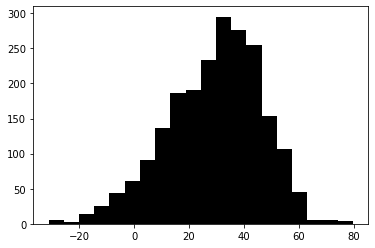

In [109]:
df['depreciation_percent'].hist(grid=False,color='k',bins=20);

Text(0, 0.5, 'Number of Cars')

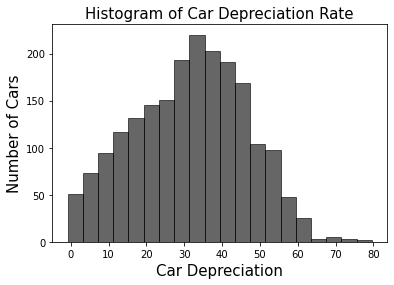

In [110]:
# Removing the data with depreciation less than -10
df = df[df['depreciation_percent']>-1]
ax = df['depreciation_percent'].hist(grid=False,color='k',bins=20,edgecolor="k",alpha=0.6);
ax.set_title('Histogram of Car Depreciation Rate',size=15)
ax.set_xlabel('Car Depreciation',size=15)
ax.set_ylabel('Number of Cars',size=15)

In [111]:
df[df.depreciation<-10]

,car_mileage,car_price,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state,Trim,City_MPG,Highway_MGP,car_age,depreciation,depreciation_percent
79,4000.0,34998.0,2019,F150,Ford,White,Automatic,2.7,325.0,6.0,34700.0,TX,XLT,0,0,2.0,-298.0,-0.858790
360,23000.0,34998.0,2019,F150,Ford,Black,Automatic,5.0,NaN,NaN,34700.0,TX,XL,0,0,2.0,-298.0,-0.858790
493,10000.0,34998.0,2019,F150,Ford,Purple,Automatic,2.7,325.0,6.0,34700.0,TX,XL,0,0,2.0,-298.0,-0.858790
599,13000.0,35998.0,2020,Mustang,Ford,Black,Automatic,5.0,NaN,8.0,35700.0,TX,GT,0,0,1.0,-298.0,-0.834734
626,4000.0,34998.0,2019,F150,Ford,Gray,Automatic,2.7,325.0,6.0,34700.0,TX,XLT,0,0,2.0,-298.0,-0.858790
741,17000.0,34998.0,2019,F150,Ford,Blue,Automatic,2.7,325.0,6.0,34700.0,TX,XLT,0,0,2.0,-298.0,-0.858790
934,16000.0,29998.0,2017,Tacoma,Toyota,Gray,Automatic,3.5,278.0,6.0,29900.0,TX,SR5,19,24,4.0,-98.0,-0.327759
1098,74000.0,29998.0,2017,Tacoma,Toyota,White,Automatic,3.5,278.0,6.0,29900.0,TX,TRD Sport,19,24,4.0,-98.0,-0.327759
1141,23000.0,40998.0,2020,Tundra,Toyota,Silver,Automatic,5.7,NaN,8.0,40900.0,TX,SR5,0,0,1.0,-98.0,-0.239609
1223,51000.0,29998.0,2017,Tacoma,Toyota,Black,Automatic,3.5,278.0,6.0,29900.0,TX,TRD Sport,19,24,4.0,-98.0,-0.327759


In [112]:
#df.plot('car_model_year',kind='bar')#.value_counts().sort_index()

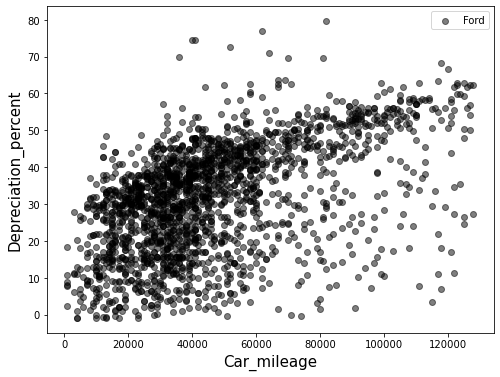

In [113]:
fig , ax = plt.subplots(figsize=(8,6))
ax.scatter(x=df.car_mileage,y=df.depreciation_percent,alpha=0.5,c='k',label='Ford');
ax.set_xlabel('Car_mileage',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend()

### Mileage

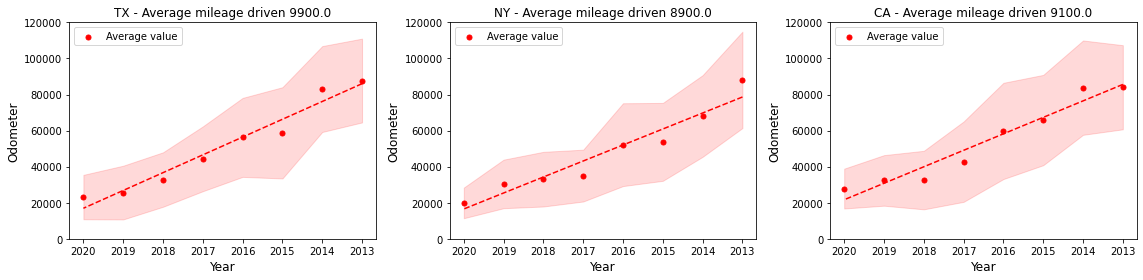

In [114]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
text_size = 12

for i,state in enumerate(df.state.unique()):
    mean_mileage = df[df.state==state].groupby('car_model_year').car_mileage.mean()
    max_mileage = df[df.state==state].groupby('car_model_year').car_mileage.max()
    min_mileage = df[df.state==state].groupby('car_model_year').car_mileage.min()
    std_mileage = df[df.state==state].groupby('car_model_year').car_mileage.std()
    
    
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Odometer',size = text_size)
    axs[i].scatter(mean_mileage.index,mean_mileage.values,color='r',label='Average value',edgecolor='r',s=25)
    axs[i].invert_xaxis()
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].fill_between(mean_mileage.index, mean_mileage.values-std_mileage.values, mean_mileage.values+std_mileage.values, color='red',alpha=0.15)
    axs[i].legend(loc='upper left')
    axs[i].set_ylim([0,120000])
    
    z = np.polyfit(mean_mileage.index, mean_mileage.values, 1)
    p = np.poly1d(z)
    axs[i].plot(mean_mileage.index,p(mean_mileage.index),"r--", label='Trendline')
    
    axs[i].set_title(state+' - '+f'Average mileage driven {round(-z[0],-2)}',size = text_size)
    
plt.tight_layout()
#plt.savefig('Odometer.jpg')

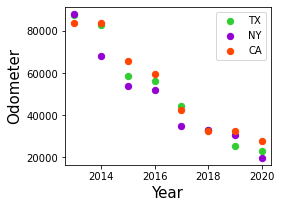

In [115]:
fig,ax = plt.subplots(figsize=(4,3))
text_size = 15
colors = ['limegreen','darkviolet','orangered']
for i,state in enumerate(df.state.unique()):
    mean_mileage = df[df.state==state].groupby('car_model_year').car_mileage.mean()
    ax.scatter(mean_mileage.index,mean_mileage.values,color=colors[i],label=state,s=40)
  
ax.set_xlabel('Year',size = text_size)
ax.set_ylabel('Odometer',size = text_size)
ax.legend(loc='upper right')   
plt.tight_layout()
# NOT REALLY USEFUL

### Depreciation

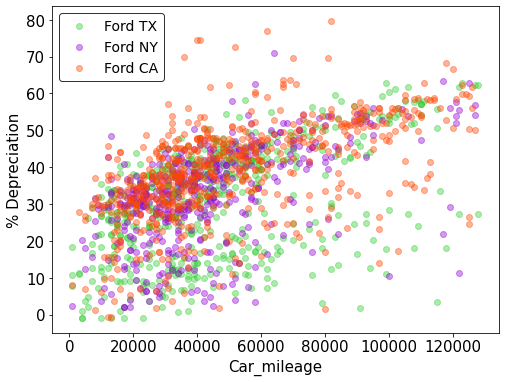

In [116]:
fig , ax = plt.subplots(figsize=(8,6))
colors = ['limegreen','darkviolet','orangered']

for i,state in enumerate(df.state.unique()):
    ax.scatter(x=df[(df.state==state) & (df.car_make=='Ford')].car_mileage,y=df[(df.state==state) & 
              (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[i],label=f'Ford {state}');

ax.set_xlabel('Car_mileage',size=15);
ax.set_ylabel('% Depreciation',size=15);
ax.legend(loc='upper left',prop={'size': 14},edgecolor='k');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels() ):
    item.set_fontsize(15)
plt.savefig('Depreciation_Ford.jpg')

### Comparison of Toyota and Ford

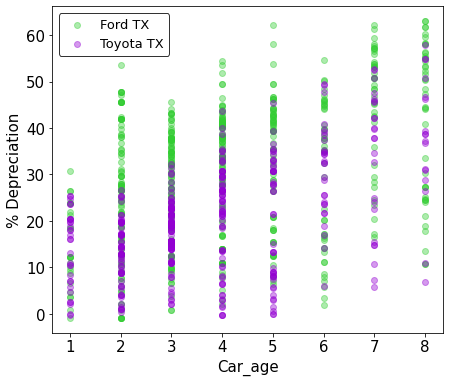

In [117]:
fig , ax = plt.subplots(figsize=(7,6))
colors = ['limegreen','darkviolet','orangered']

ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Ford')].car_age,y=df[(df.state=='TX') & (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[0],label=f'Ford TX');
ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Toyota')].car_age,y=df[(df.state=='TX') & (df.car_make=='Toyota')].depreciation_percent,alpha=0.4,c=colors[1],label=f'Toyota TX');


ax.set_xlabel('Car_age',size=15);
ax.set_ylabel('% Depreciation',size=15);
ax.legend(loc='upper left',prop={'size': 13},edgecolor='k');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels() ):
    item.set_fontsize(15)
#plt.savefig('Ford_Toyota.jpg')

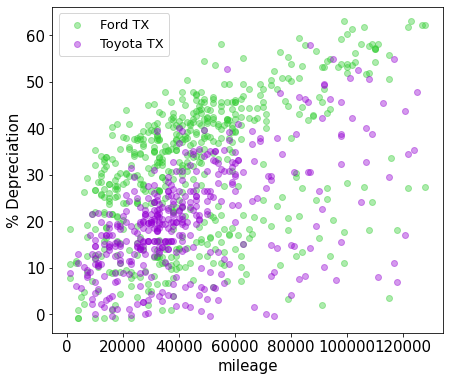

In [118]:
fig , ax = plt.subplots(figsize=(7,6))
colors = ['limegreen','darkviolet','orangered']

ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Ford')].car_mileage,y=df[(df.state=='TX') & (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[0],label=f'Ford TX');
ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Toyota')].car_mileage,y=df[(df.state=='TX') & (df.car_make=='Toyota')].depreciation_percent,alpha=0.4,c=colors[1],label=f'Toyota TX');


ax.set_xlabel('mileage',size=15);
ax.set_ylabel('% Depreciation',size=15);
ax.legend(prop={'size': 13});
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax2.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('Ford_Toyota2.jpg')

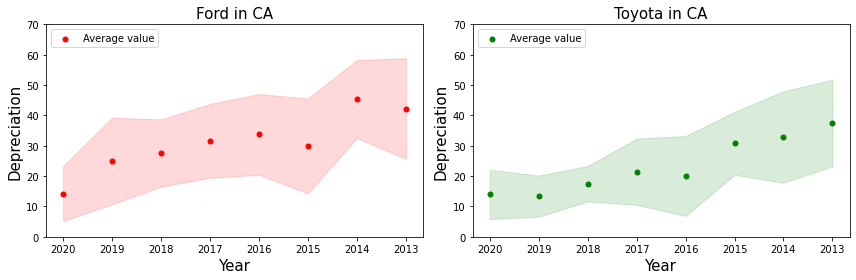

In [119]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
colors=['r','g']
for i,car_brand in enumerate(['Ford','Toyota']):
    mean_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.mean()
    max_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.max()
    min_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.min()
    std_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.std()

    axs[i].set_title(car_brand +' in '+state,size = text_size)
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Depreciation',size = text_size)
    axs[i].scatter(mean_dep.index,mean_dep.values,color=colors[i],label='Average value',edgecolor=colors[i],s=25)
    axs[i].invert_xaxis()
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].fill_between(mean_dep.index, mean_dep.values-std_dep.values, mean_dep.values+std_dep.values, color=colors[i],alpha=0.15)
    axs[i].legend(loc='upper left')
    axs[i].set_ylim([0,70])

plt.tight_layout()

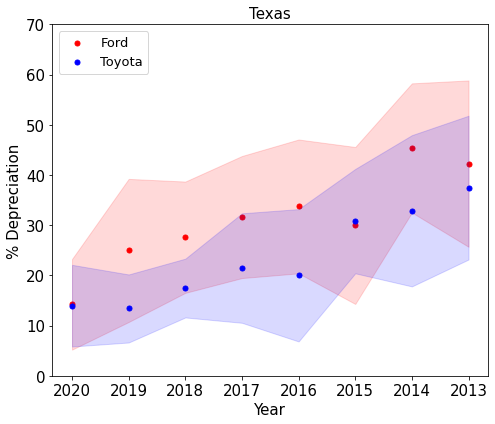

In [120]:
fig,ax = plt.subplots(figsize=(7,6))
colors=['r','b']
for i,car_brand in enumerate(['Ford','Toyota']):
    mean_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.mean()
    max_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.max()
    min_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.min()
    std_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.std()

    ax.set_title('Texas',size = text_size)
    ax.set_xlabel('Year',size = text_size)
    ax.set_ylabel('% Depreciation',size = text_size)
    ax.scatter(mean_dep.index,mean_dep.values,color=colors[i],label=car_brand,edgecolor=colors[i],s=25)
    
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    ax.fill_between(mean_dep.index, mean_dep.values-std_dep.values, mean_dep.values+std_dep.values, color=colors[i],alpha=0.15)
    ax.legend(loc='upper left',prop={'size': 13})
    ax.set_ylim([0,70])
ax.invert_xaxis()

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

plt.tight_layout()
#plt.savefig('Ford_Toyota_3.jpg')

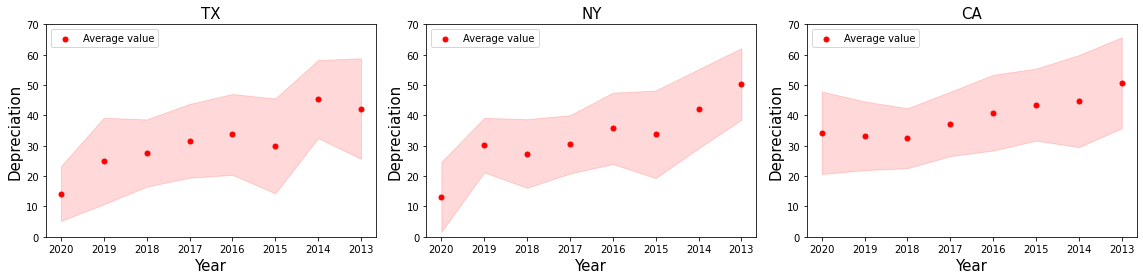

In [121]:
fig,axs = plt.subplots(1,3,figsize=(16,4))

for i,state in enumerate(df.state.unique()):
    mean_dep = df[(df.state==state)&(df.car_make=='Ford')].groupby('car_model_year').depreciation_percent.mean()
    max_dep = df[(df.state==state)&(df.car_make=='Ford')].groupby('car_model_year').depreciation_percent.max()
    min_dep = df[(df.state==state)&(df.car_make=='Ford')].groupby('car_model_year').depreciation_percent.min()
    std_dep = df[(df.state==state)&(df.car_make=='Ford')].groupby('car_model_year').depreciation_percent.std()

    axs[i].set_title(state,size = text_size)
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Depreciation',size = text_size)
    axs[i].scatter(mean_dep.index,mean_dep.values,color='r',label='Average value',edgecolor='r',s=25)
    axs[i].invert_xaxis()
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].fill_between(mean_dep.index, mean_dep.values-std_dep.values, mean_dep.values+std_dep.values, color='red',alpha=0.15)
    axs[i].legend(loc='upper left')
    axs[i].set_ylim([0,70])

plt.tight_layout()

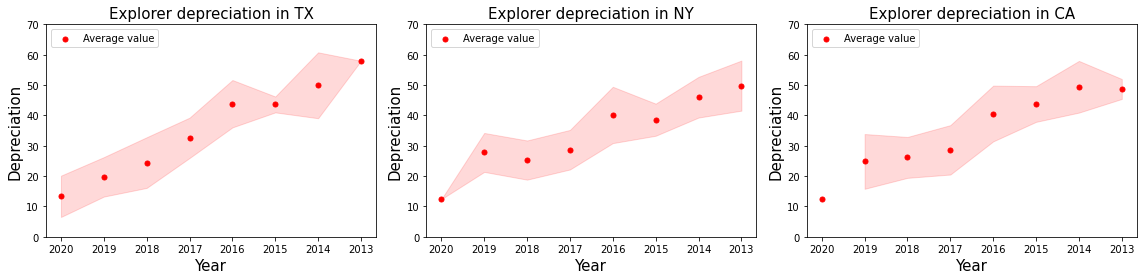

In [122]:
fig,axs = plt.subplots(1,3,figsize=(16,4))

filter_model = 'Explorer'
for i,state in enumerate(df.state.unique()):
    mean_dep = df[(df.state==state)&(df.car_model=='Explorer')].groupby('car_model_year').depreciation_percent.mean()
    max_dep = df[(df.state==state)&(df.car_model=='Explorer')].groupby('car_model_year').depreciation_percent.max()
    min_dep = df[(df.state==state)&(df.car_model=='Explorer')].groupby('car_model_year').depreciation_percent.min()
    std_dep = df[(df.state==state)&(df.car_model=='Explorer')].groupby('car_model_year').depreciation_percent.std()
    axs[i].set_title('Explorer depreciation in '+state,size = text_size)
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Depreciation',size = text_size)
    axs[i].scatter(mean_dep.index,mean_dep.values,color='r',label='Average value',edgecolor='r',s=25)
    axs[i].invert_xaxis()
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].fill_between(mean_dep.index, mean_dep.values-std_dep.values, mean_dep.values+std_dep.values, color='red',alpha=0.15)
    axs[i].legend(loc='upper left')
    axs[i].set_ylim([0,70])

#for item in ([axs.title, axs.xaxis.label, axs.yaxis.label] +
#             ax.get_xticklabels() + ax.get_yticklabels()):
#    item.set_fontsize(15)
    
plt.tight_layout()

### Car Categoties

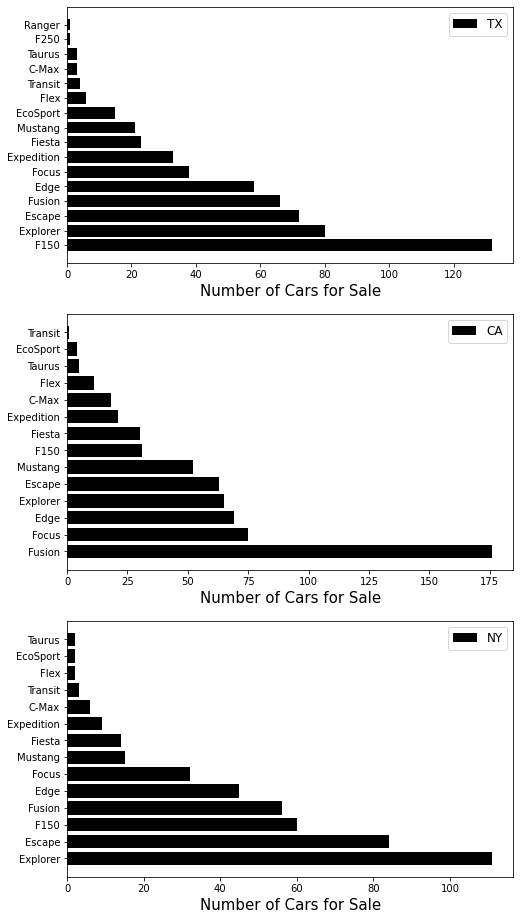

In [123]:
Ford_TX = df[(df.state=='TX')&(df.car_make=='Ford')].car_model.value_counts()
fig,axs = plt.subplots(3,1,figsize=(8,16))
axs[0].barh(y=Ford_TX.index,width=Ford_TX.values,label='TX',color='k')
axs[0].set_xlabel('Number of Cars for Sale',size=15);
axs[0].legend(prop={'size': 12});

Ford_CA = df[(df.state=='CA')&(df.car_make=='Ford')].car_model.value_counts()
axs[1].barh(y=Ford_CA.index,width=Ford_CA.values,label='CA',color='k')
axs[1].set_xlabel('Number of Cars for Sale',size=15);
axs[1].legend(prop={'size': 12});

Ford_NY = df[(df.state=='NY')&(df.car_make=='Ford')].car_model.value_counts()
axs[2].barh(y=Ford_NY.index,width=Ford_NY.values,label='NY',color='k')
axs[2].set_xlabel('Number of Cars for Sale',size=15);
axs[2].legend(prop={'size': 12});
#plt.savefig('Car_Distribution.jpg')

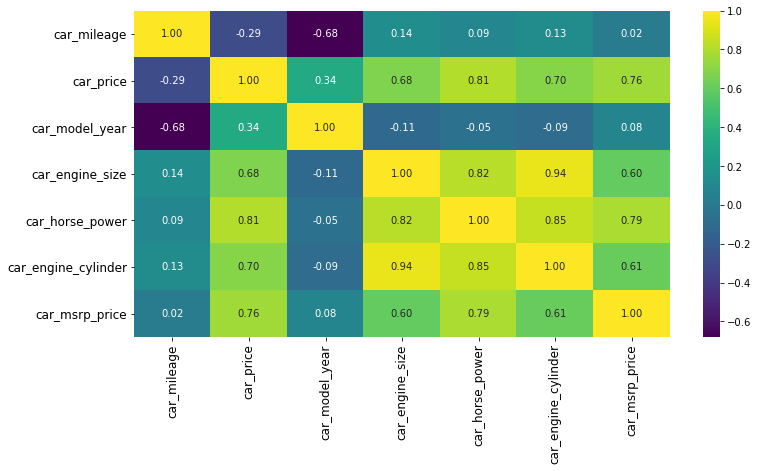

In [124]:
df_corr = df.drop(['depreciation_percent','Highway_MGP','City_MPG','Trim','depreciation','state','car_age'], axis=1)
df_corr.columns
fig,ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="viridis", fmt="0.2f");

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels() ):
    item.set_fontsize(12)
plt.savefig('Heatmap.jpg')

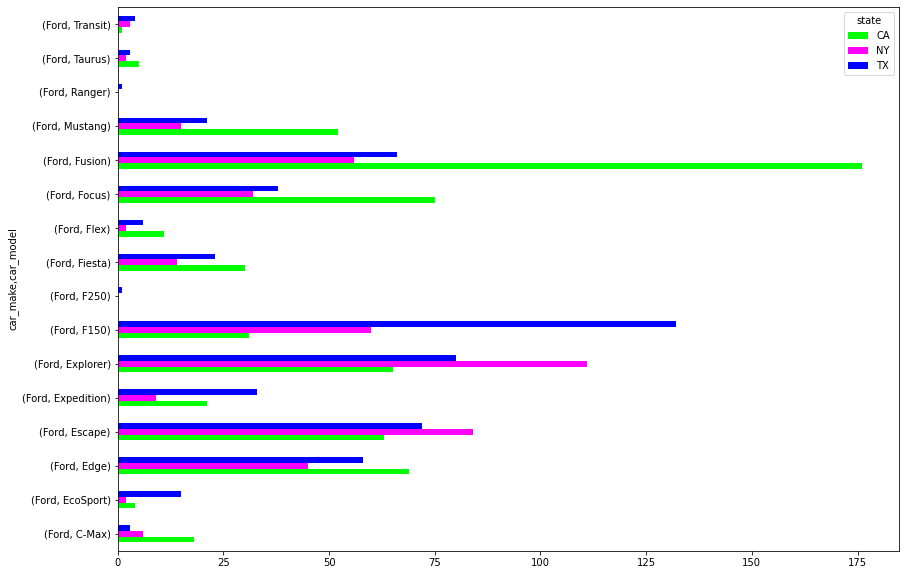

In [125]:
df2=df[df.car_make=='Ford']
df2.groupby(['state','car_make']).car_model.value_counts().unstack('state').plot.barh(figsize=(14,10),color=['lime','magenta','blue']);

In [126]:
#df[(df.state=='TX')&(df.car_model=='Explorer')].car_model_year.value_counts()

In [127]:
#df[(df.state=='NY')&(df.car_model=='Explorer')].car_model_year.value_counts()

In [128]:
#df[(df.state=='CA')&(df.car_model=='Explorer')].car_model_year.value_counts()

### Car Price Difference

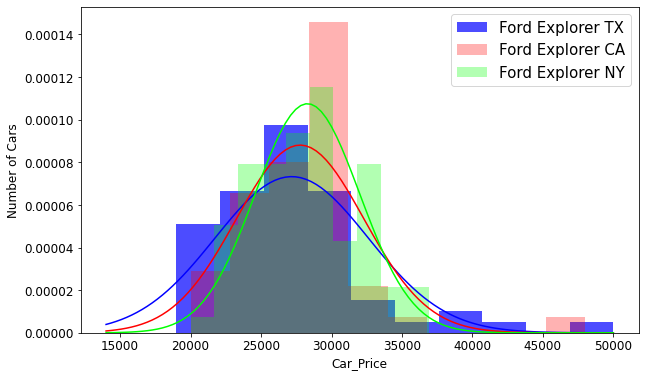

In [129]:
fig,ax = plt.subplots(figsize=(10,6))

Price_Explorer_TX2017 = df[(df.state=='TX')&(df.car_model=='Explorer')&(df.car_model_year>=2017)]
Price_Explorer_CA2017 = df[(df.state=='CA')&(df.car_model=='Explorer')&(df.car_model_year>=2017)]
Price_Explorer_NY2017 = df[(df.state=='NY')&(df.car_model=='Explorer')&(df.car_model_year>=2017)]

ax.hist(Price_Explorer_TX2017['car_price'],label='Ford Explorer TX',color='b',alpha=0.7,density=True)
ax.hist(Price_Explorer_CA2017['car_price'],label='Ford Explorer CA',color='r',alpha=0.3,density=True)
ax.hist(Price_Explorer_NY2017['car_price'],label='Ford Explorer NY',color='lime',alpha=0.3,density=True)

ax.plot(x,stats.norm(TX2017_mean ,TX2017_std).pdf(x),color='b')
ax.plot(x,stats.norm(CA2017_mean ,CA2017_std).pdf(x),color='r')
ax.plot(x,stats.norm(NY2017_mean ,NY2017_std).pdf(x),color='lime')

ax.set_xlabel('Car_Price',size=15)
ax.set_ylabel('Number of Cars',size=15)
ax.legend(prop={'size': 15});

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax2.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(12)

plt.savefig('Ali2.jpg')

In [130]:
TX2017_mean = Price_Explorer_TX2017.car_price.mean()
TX2017_std = Price_Explorer_TX2017.car_price.std()
print(f'Ford Explorer average price is {round(TX2017_mean)} with std of {round(TX2017_std)} in TX')
CA2017_mean = Price_Explorer_CA2017.car_price.mean()
CA2017_std = Price_Explorer_CA2017.car_price.std()
print(f'Ford Explorer average price is {round(CA2017_mean)} with std of {round(CA2017_std)} in CA')
NY2017_mean = Price_Explorer_NY2017.car_price.mean()
NY2017_std = Price_Explorer_NY2017.car_price.std()
print(f'Ford Explorer average price is {round(NY2017_mean)} with std of {round(NY2017_std)} in NY')

x = np.linspace(14000,50000,100)
y = stats.norm(TX2017_mean ,TX2017_std)

Ford Explorer average price is 27173 with std of 5443 in TX
Ford Explorer average price is 27774 with std of 4529 in CA
Ford Explorer average price is 28292 with std of 3710 in NY


In [131]:
# TX vs. CA
# Null: The mean price of Ford Explorer is the same in TX vs. CA
# Alternate: The mean price in CA is higher than TX
# Significane level: 0.05/3 = 0.016

p-value for different average kickflip height: 0.26


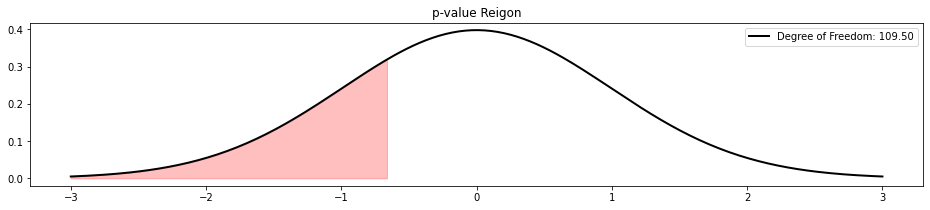

In [132]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

test_statistic = welch_test_statistic(Price_Explorer_TX2017.car_price, Price_Explorer_CA2017.car_price)

degreef = welch_satterhwaithe_df(Price_Explorer_TX2017.car_price, Price_Explorer_CA2017.car_price)

x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(degreef)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(degreef),color='k')
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");
p_value = students.cdf(test_statistic)
print("p-value for different average kickflip height: {:2.2f}".format(p_value))

In [133]:
# Welch t-test
res_TX_CA = stats.ttest_ind(Price_Explorer_TX2017.car_price,Price_Explorer_CA2017.car_price,equal_var=False)
1-res_TX_CA[1]

0.4747714751538161

In [134]:
#Mannwhitneyu Test
res_TX_CA = stats.mannwhitneyu(Price_Explorer_TX2017.car_price,Price_Explorer_CA2017.car_price, alternative="less")
res_TX_CA

MannwhitneyuResult(statistic=1343.0, pvalue=0.11920664056651814)

In [135]:
# TX vs. NY
# Null: The mean price of Ford Explorer is the same in TX vs. NY
# Alternate: The mean price in NY is higher than TX
# Significane level: 0.05/3

In [136]:
# Welch t-test
res_TX_NY = stats.ttest_ind(Price_Explorer_TX2017.car_price,Price_Explorer_NY2017.car_price,equal_var=False)
1-res_TX_NY[1]

0.8359202356748581

p-value for different average kickflip height: 0.08


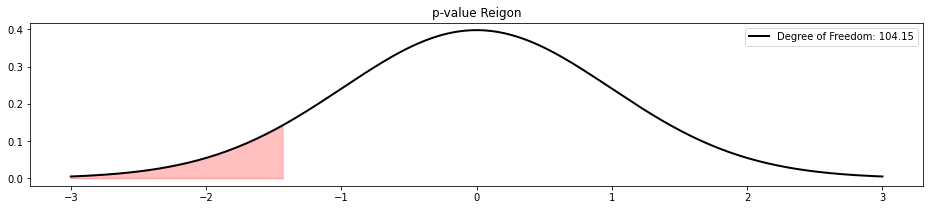

In [137]:
test_statistic = welch_test_statistic(Price_Explorer_TX2017.car_price, Price_Explorer_NY2017.car_price)

degreef = welch_satterhwaithe_df(Price_Explorer_TX2017.car_price, Price_Explorer_NY2017.car_price)

x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(degreef)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(degreef),color='k')
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");
p_value = students.cdf(test_statistic)
print("p-value for different average kickflip height: {:2.2f}".format(p_value))

In [138]:
#Mannwhitneyu Test
res_TX_NY = stats.mannwhitneyu(Price_Explorer_TX2017.car_price,Price_Explorer_NY2017.car_price, alternative="less")
res_TX_NY

MannwhitneyuResult(statistic=2042.5, pvalue=0.015382819961419361)

In [139]:
stats.ttest_ind(Price_Explorer_TX2017.car_price,Price_Explorer_NY2017.car_price,equal_var=False)

Ttest_indResult(statistic=-1.401371073330721, pvalue=0.1640797643251419)

In [140]:
# NY vs. CA
# Null: The mean price of Ford Explorer is the same in NY vs. CA
# Alternate: The mean price in NY is higher than CA
# Significane level: 0.05/3

In [141]:
# Welch t-test
res_CA_NY = stats.ttest_ind(Price_Explorer_CA2017.car_price,Price_Explorer_NY2017.car_price,equal_var=False)
1-res_CA_NY[1]

0.49991124269707643

In [142]:
#Mannwhitneyu Test
res_CA_NY = stats.mannwhitneyu(Price_Explorer_CA2017.car_price,Price_Explorer_NY2017.car_price, alternative="less")
res_CA_NY

MannwhitneyuResult(statistic=1806.5, pvalue=0.16748010129435925)

### Color

In [143]:
#Black, Gray, Silver, White
#ax = df.groupby(['state']).car_color.value_counts().unstack('state').plot.bar(figsize=(14,10),color=['lime','red','blue']);
#ax.legend(loc='upper left');
df

,car_mileage,car_price,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state,Trim,City_MPG,Highway_MGP,car_age,depreciation,depreciation_percent
0,93000.0,13998.0,2015,Fusion,Ford,Red,Automatic,2.0,240.0,4.0,30800.0,TX,Titanium,22,33,6.0,16802.0,54.551948
1,115000.0,36998.0,2015,F250,Ford,Silver,Automatic,6.7,400.0,8.0,38300.0,TX,XLT,12,17,6.0,1302.0,3.399478
2,35000.0,20998.0,2018,Transit,Ford,Gray,Automatic,2.5,169.0,4.0,28000.0,TX,Connect XLT,19,27,3.0,7002.0,25.007143
4,44000.0,25998.0,2015,F150,Ford,Red,Automatic,2.7,325.0,6.0,33600.0,TX,XL,18,23,6.0,7602.0,22.625000
5,46000.0,22998.0,2017,Edge,Ford,Silver,Automatic,3.5,280.0,6.0,37600.0,TX,Titanium,17,24,4.0,14602.0,38.835106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,27000.0,22998.0,2017,Edge,Ford,Silver,Automatic,2.0,245.0,4.0,31800.0,CA,SEL,20,29,4.0,8802.0,27.679245
2623,84000.0,13998.0,2018,Escape,Ford,Blue,Automatic,1.5,179.0,NaN,25700.0,CA,SE,23,30,3.0,11702.0,45.533074
2628,90000.0,11599.0,2014,Escape,Ford,White,Automatic,2.5,168.0,4.0,23100.0,CA,S,22,31,7.0,11501.0,49.787879
2629,42000.0,13998.0,2015,Escape,Ford,White,Automatic,2.5,168.0,4.0,23500.0,CA,S,22,31,6.0,9502.0,40.434043


In [144]:
df_color = df[df.car_color.isin(['Black','Gray','Silver','White'])]

In [145]:
df_color[df_color.state=='TX'].car_color.value_counts()

White     212
Gray      194
Black     175
Silver    155
Name: car_color, dtype: int64

In [146]:
df_color[df_color.state=='CA'].car_color.value_counts()

Gray      137
White     132
Black     117
Silver     96
Name: car_color, dtype: int64

In [147]:
df_color[df_color.state=='NY'].car_color.value_counts()

Black     105
Gray       86
White      72
Silver     60
Name: car_color, dtype: int64

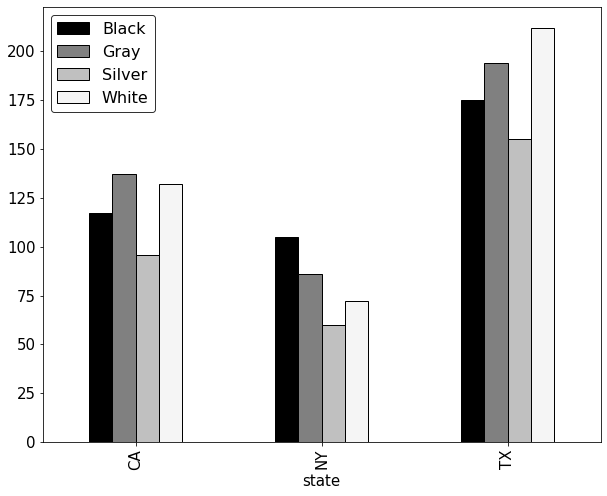

In [148]:
#Black, Gray, Silver, White
ax = df_color.groupby(['state']).car_color.value_counts().unstack('car_color').plot.bar(figsize=(10,8),color=['k','gray','silver','whitesmoke'],edgecolor='k');
ax.legend(loc='upper left',prop={'size': 16},edgecolor='k');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
fig.tight_layout()

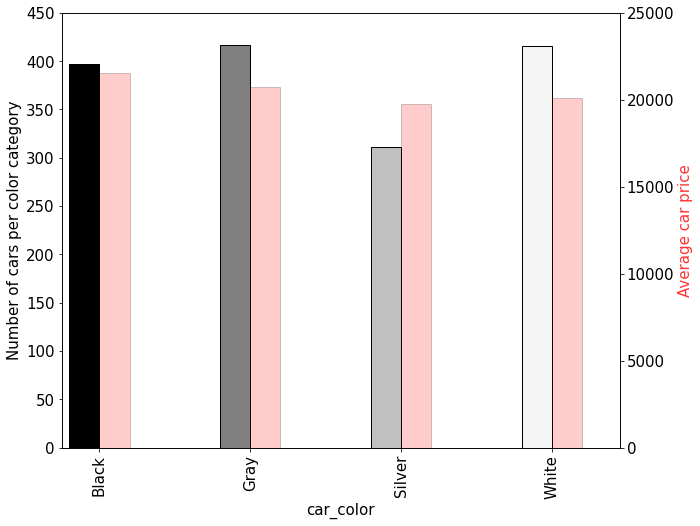

In [149]:
#Black, Gray, Silver, White
#ax = df_color.car_color.value_counts().plot.bar(figsize=(10,8),color=['k','gray','silver','whitesmoke'],edgecolor='k');
ax = df_color.groupby('car_color').car_price.count().plot.bar(figsize=(10,8),color=['k','gray','silver','whitesmoke'],edgecolor='k',position=1,width=0.2);
ax.set_ylabel('Number of cars per color category')
ax.set_ylim([0,450])
ax2 = ax.twinx()

ax2 = df_color.groupby('car_color').car_price.mean().plot.bar(figsize=(10,8), color='r',edgecolor='k',alpha=0.2,position=0,width=0.2);
ax2.set_ylabel('Average car price',color='red',alpha=0.8)
ax2.set_ylim([0,25000])

#ax.legend(loc='upper left',prop={'size': 16},edgecolor='k');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax2.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(15)
fig.tight_layout()
plt.savefig('Car_distribution.jpg')

In [150]:
# Null Hypothesis: The distribution of the car listing price is the same for diffenert car color 
# Alternative Hypothesis: The distribution of the car listing price is different 
# Significance Level: 0.05/4

In [151]:
df_grouped = df.groupby(['car_color']).car_price.mean()

df_grouped = df_grouped.loc[['Black','White','Gray','Silver']]

mean_value = df_grouped.mean()

number_categories = len(df_grouped)

observed = df_grouped.values

expected = [mean_value]*number_categories 

stat,p_value = stats.chisquare(observed,expected)

print (f'The calculated t-statistic is {stat} with p-value of {p_value}')

The calculated t-statistic is 94.47285150997689 with p-value of 2.396628359872397e-20


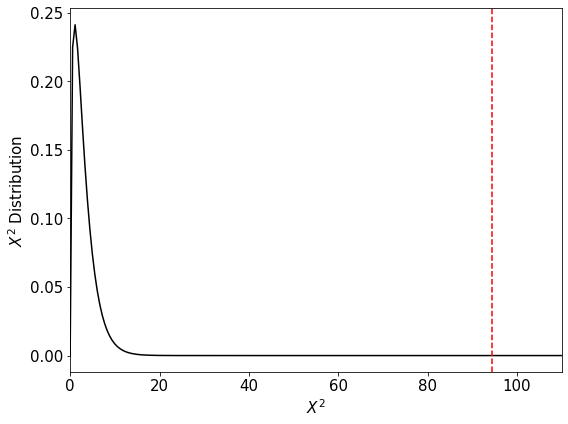

In [152]:
fig, ax = plt.subplots(figsize=(8,6))
x = np.linspace(0,110,200)
ax.plot(x,stats.chi2.pdf(x,number_categories-1),color='k');
ax.set_xlim([0,110])
ax.set_xlabel('$X^2$')
ax.set_ylabel('$X^2$ Distribution')
ax.axvline(stat,ls='--',c='r')

#Axes.fill_between(self, x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
fig.tight_layout()
#plt.savefig('ChiSquare.jpg')

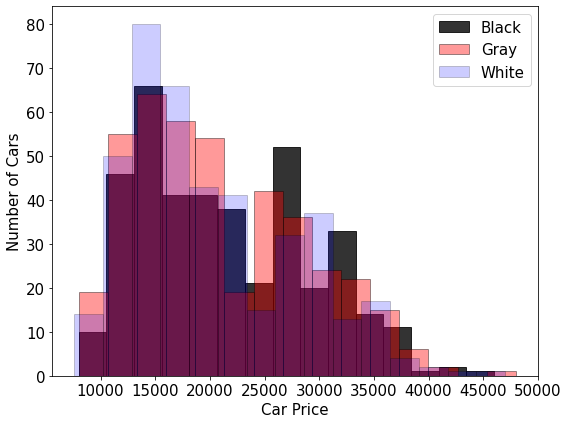

In [159]:
fig,ax=plt.subplots(figsize=(8,6))
df_black = df[df.car_color=='Black']
df_black_mean = df_black.car_price.mean()

df_gray = df[df.car_color=='Gray']
df_gray_mean = df_gray.car_price.mean()

df_white = df[df.car_color=='White']
df_white_mean = df_white.car_price.mean()

ax.hist(df_black.car_price,edgecolor='k',bins=15,label='Black',color='k',alpha=0.8);
ax.hist(df_gray.car_price,edgecolor='k',bins=15,label='Gray',color='r',alpha=0.4);
ax.hist(df_white.car_price,edgecolor='k',bins=15,label='White',color='b',alpha=0.2)
#ax.axvline(df_black_mean,0,200,color='k',ls='--')
#ax.axvline(df_gray_mean,0,200,color='r',ls='--')
#ax.axvline(df_white_mean,0,200,color='b',ls='--')


ax.legend(prop={'size': 15})
ax.set_ylabel('Number of Cars')
ax.set_xlabel('Car Price')
#ax.set_xlim([0,60000])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
fig.tight_layout()
plt.savefig('Car_color.jpg')

In [154]:
First=stats.ttest_ind(df_black.car_price,df_gray.car_price,equal_var=False)
First

Ttest_indResult(statistic=1.4590862354060912, pvalue=0.14492869527153104)

In [157]:
Second=stats.ttest_ind(df_black.car_price,df_white.car_price,equal_var=False)
Second

Ttest_indResult(statistic=2.7842971341653246, pvalue=0.005490076181371923)

In [158]:
Third=stats.ttest_ind(df_gray.car_price,df_white.car_price,equal_var=False)
Third

Ttest_indResult(statistic=1.3074507640317794, pvalue=0.19142180561648597)

p-value for different average kickflip height: 0.01


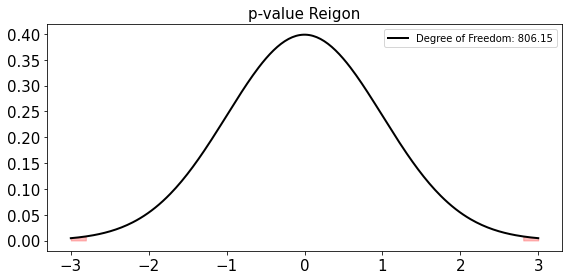

In [160]:
test_statistic = welch_test_statistic(df_black.car_price, df_white.car_price)

degreef = welch_satterhwaithe_df(df_black.car_price, df_white.car_price)

x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(8, 4))
students = stats.t(degreef)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(degreef),color='k')
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <=  -test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");
p_value = 2*(1-students.cdf(test_statistic))
print("p-value for different average kickflip height: {:2.2f}".format(p_value))

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
fig.tight_layout()

plt.savefig('Welch-t-test.jpg')

<AxesSubplot:>

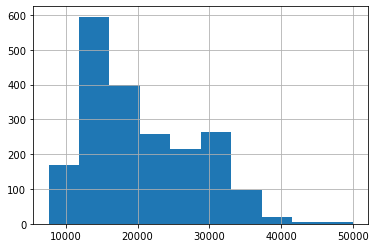

In [161]:
df.car_price.hist()